## MATH 4388: Machine Learning Methods 


### Chapter 9: Unsupervised Learning Techniques

### Overview 

* Unsupervised learning deals with unlabeled data, meaning the model is not provided with output labels during training
    * Thus, we have the input feature matrix $\mathbf{X}$ without the output vector $\mathbf{y}$
   * The goal is to identify patterns, structures, or relationships within the data without explicit guidance from labeled examples 
   * Labeling data for supervised learning can be a time-consuming and expensive task, especially when dealing with large data sets or complex tasks that require domain expertise
       * Thus, unsupervised learning is essential for making the overall machine learning pipeline more efficient and cost-effective
   
* Clustering methods aim to partition a data set into clusters or groups in such a way that data points within the same cluster are more similar to each other than to those in other clusters
    * There is no universal definition of what a cluster is
    * Thus, the notion of similarity is crucial in clustering methods 
    * We cover three popular clustering techniques 
        + K-means clustering 
        + Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
        + Gaussian mixtures 

### K-means clustering
<hr style="border:2px solid gray">

* Assume we have $K$ cluster centers $\boldsymbol{\mu}_k, k=1,\ldots,K,$ in $\mathbb{R}^D$, so we can cluster the data by assigning each sample $\mathbf{x}_n$ to its closest center

$$z_n^*=\underset{k\in\{1,\ldots,K\}}{\mathrm{argmin}} \|\mathbf{x}_n - \boldsymbol{\mu}_k\|_2^2$$

* But, we don't know the cluster centers, so we should minimize the following loss/cost function

$$J(\mathbf{M},\mathbf{Z})=\sum_{n=1}^N \|\mathbf{x}_n - \boldsymbol{\mu}_{z_n}\|_2^2 = \|\mathbf{X} - \mathbf{Z}\mathbf{M}\|_F^2$$

* $\mathbf{X}\in\mathbb{R}^{N\times D}$ (data matrix), $\mathbf{Z}\in[0,1]^{N\times K}$ (membership matrix), and $\mathbf{M}\in\mathbb{R}^{K\times D}$ (matrix of cluster centers)
    * Frobenius norm: $\|\mathbf{A}\|_F^2= \sum_{i}\sum_{j} a_{ij}^2$

* K-means clustering algorithm  
    * Start by placing the centers randomly (pick $K$ instances at random)
    * Iterate over the following two steps 
        + Assign each instance to the cluster whose center is closest 
        + Update each cluster center by computing the mean of instances in that cluster

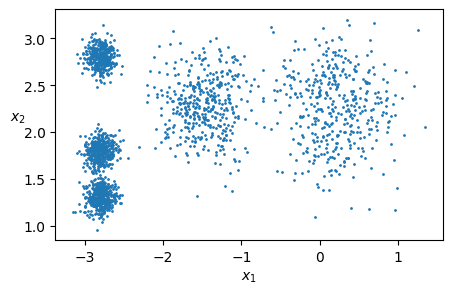

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# We create a synthetic data set with 5 clusters or blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) 

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7) 

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

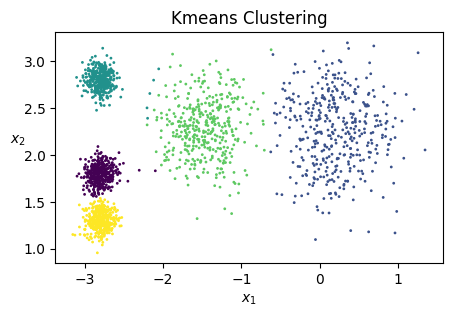

In [2]:
# Apply K-means clustering to this data set 

# caveat: the number of clusters must be defined
kmeans = KMeans(n_clusters=5, n_init=5, random_state=42) 

y_pred = kmeans.fit_predict(X)

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title('Kmeans Clustering')
plt.show()

In [3]:
# find cluster centers
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

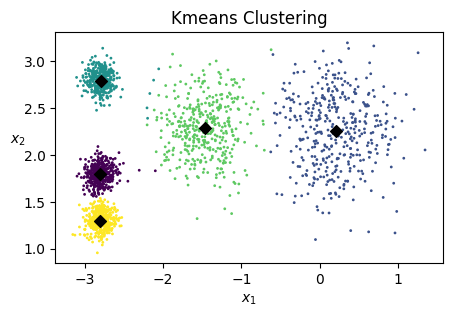

In [4]:
# Plot cluster centers
plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='k', marker='D')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title('Kmeans Clustering')
plt.show()

In [5]:
# We can predict the labels of new instances

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

### K-means clustering and initialization
<hr style="border:2px solid gray">

* K-means clustering needs to be initialized carefully

* Therefore, we can use multiple restarts, i.e., we run the algorithm multiple times from different random starting points, and then pick the best solution
    * Use the "n_init" argument
    * But, we can use better initialization techniques
    
* The K-means++ algorithm

    * Pick the centers sequentially so as to “cover” the data
    * Each point is picked with probability proportional to its squared distance to its cluster center
    * Thus, at each iteration $t$, we get 

$$p(\boldsymbol{\mu}_t=\mathbf{x}_n)=\frac{D_{t-1}(\mathbf{x}_n)}{\sum_{n'} D_{t-1}(\mathbf{x}_{n'})}$$

where 

$$D_{t-1}(\mathbf{x}_n)=\min_{k\in\{1,\ldots,t-1\}}\|\mathbf{x}_n - \boldsymbol{\mu}_k\|_2^2$$


### Finding the optimal number of clusters 
<hr style="border:2px solid gray">

* A natural choice for picking $K$ is to pick the value that minimizes the reconstruction error

$$J(\mathbf{M},\mathbf{Z})=\sum_{n=1}^N \|\mathbf{x}_n - \boldsymbol{\mu}_{z_n}\|_2^2 = \|\mathbf{X} - \mathbf{Z}\mathbf{M}\|_F^2$$

* This is known as the inertia or within-cluster sum-of-squares criterion
* This idea wouldn't work because the inertia monotonically decreases with $K$
* However, we can plot the inertia as a function of $K$ and find the elbow

/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farhad/an

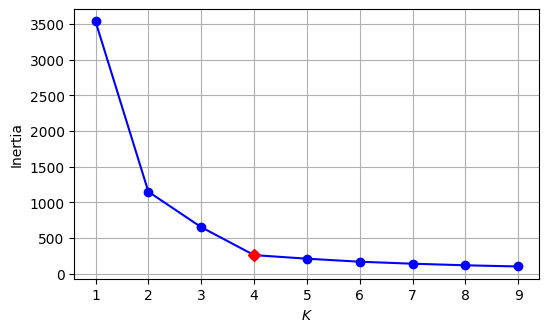

In [6]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(6, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.plot(4, inertias[3], 'rD')
plt.xlabel("$K$")
plt.ylabel("Inertia")
plt.grid()
plt.show()

/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


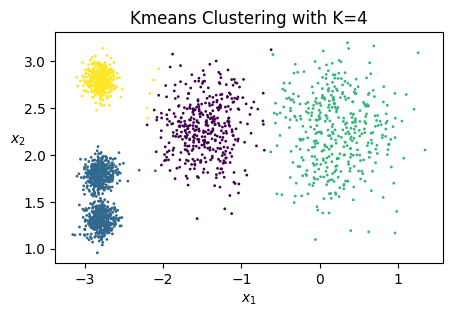

In [7]:
# solve the problem with K=4

kmeans = KMeans(n_clusters=4, random_state=42)

y_pred = kmeans.fit_predict(X)

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title('Kmeans Clustering with K=4')
plt.show()

### Using silhouette score instead of inertia
<hr style="border:2px solid gray">

* For each sample, find 
    * the mean intra-cluster distance $a$
    * the mean nearest-cluster distance $b$
* Then, we compute the coefficient as follows 

$$\frac{b-a}{\max(a,b)}$$
    
* Finally, we can find the average over all samples 

* The best value is 1, the worst value is -1, and values near 0 indicate overlapping clusters 


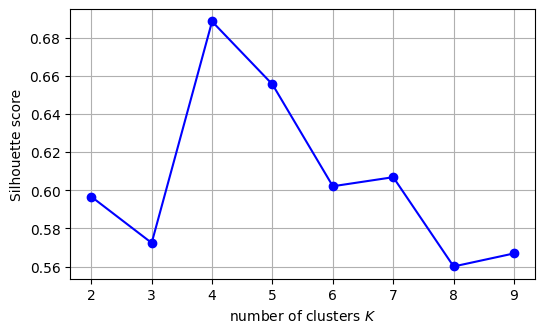

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(6, 3.5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("number of clusters $K$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

### DBSCAN
<hr style="border:2px solid gray">

* This algorithm defines clusters as continuous regions of high density 

    * For each instance, it counts how many samples are located within a small distance $\varepsilon$ from it ($\varepsilon$-neighborhood)
    * If an instance has at least "min_samples" samples in its $\varepsilon$-neighborhood, then it is considered a “core instance”
    * All instances in the neighborhood of a core instance belong to the same cluster
    * Any instance that is not a “core instance” and does not have one in its neighborhood is considered an anomaly  

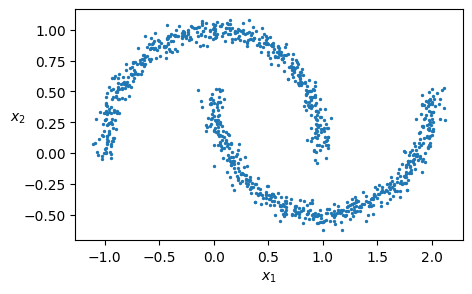

In [9]:
# Create a nonlinear data set 

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

/Users/farhad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


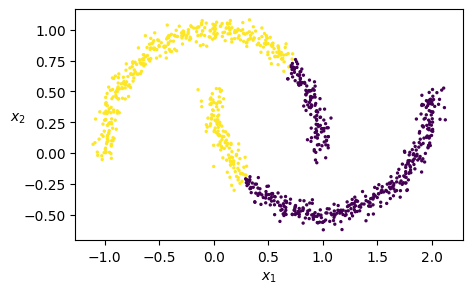

In [10]:
# Does K-means clustering work?

km = KMeans(n_clusters=2,  random_state=42)
km.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=km.labels_, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

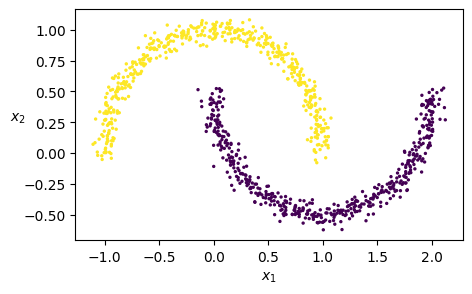

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)

dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

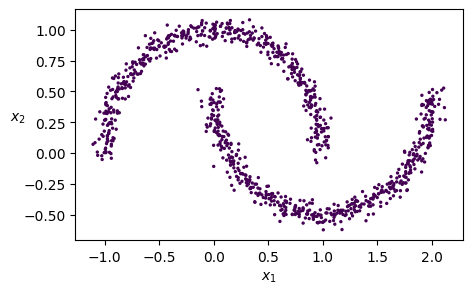

In [12]:
# Does DBSCAN work with this value of eps? 

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

### Gaussian Mixtures
<hr style="border:2px solid gray">

* The Gaussian Mixture Model (GMM)assumes that the data is generated from a mixture of multiple Gaussian distributions, each representing a cluster

* The goal of the GMM is to identify these Gaussian distributions and estimate their parameters to assign data points to the most probable clusters

$$P(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)
$$

* $\pi_k$ is the mixing coefficient of the $k$-th Gaussian component, representing the probability of selecting the $k$-th component

* $\boldsymbol{\mu}_k$ is the mean vector of the $k$-th Gaussian component

* $\boldsymbol{\Sigma}_k$ is the covariance matrix of the $k$-th Gaussian component

* $\mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)$ is the probability density function of the multivariate Gaussian distribution with mean $\boldsymbol{\mu}_k$ and covariance $\boldsymbol{\Sigma}_k$



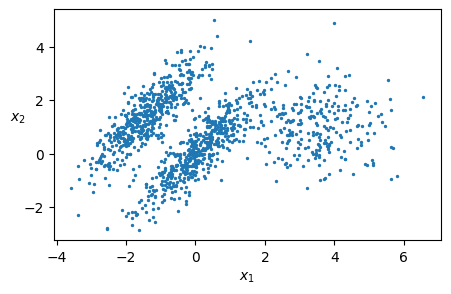

In [13]:
# create a 2D data set in the form of a mixture model 
# Thus, we use make_blobs two times 

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)

X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)

X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

plt.rcParams.update({'font.size': 10, "figure.figsize": (5,3)})
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

In [14]:
from sklearn.mixture import GaussianMixture

# number of clusters should be provided 
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)

gm.fit(X)


GaussianMixture(n_components=3, n_init=10, random_state=42)

In [15]:
# pi_k 

gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [16]:
# mu_k 

gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [17]:
# sigma_k 

gm.covariances_


array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

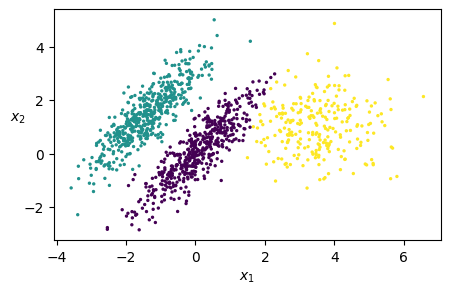

In [18]:
# Plot returned clusters 
y_pred = gm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()